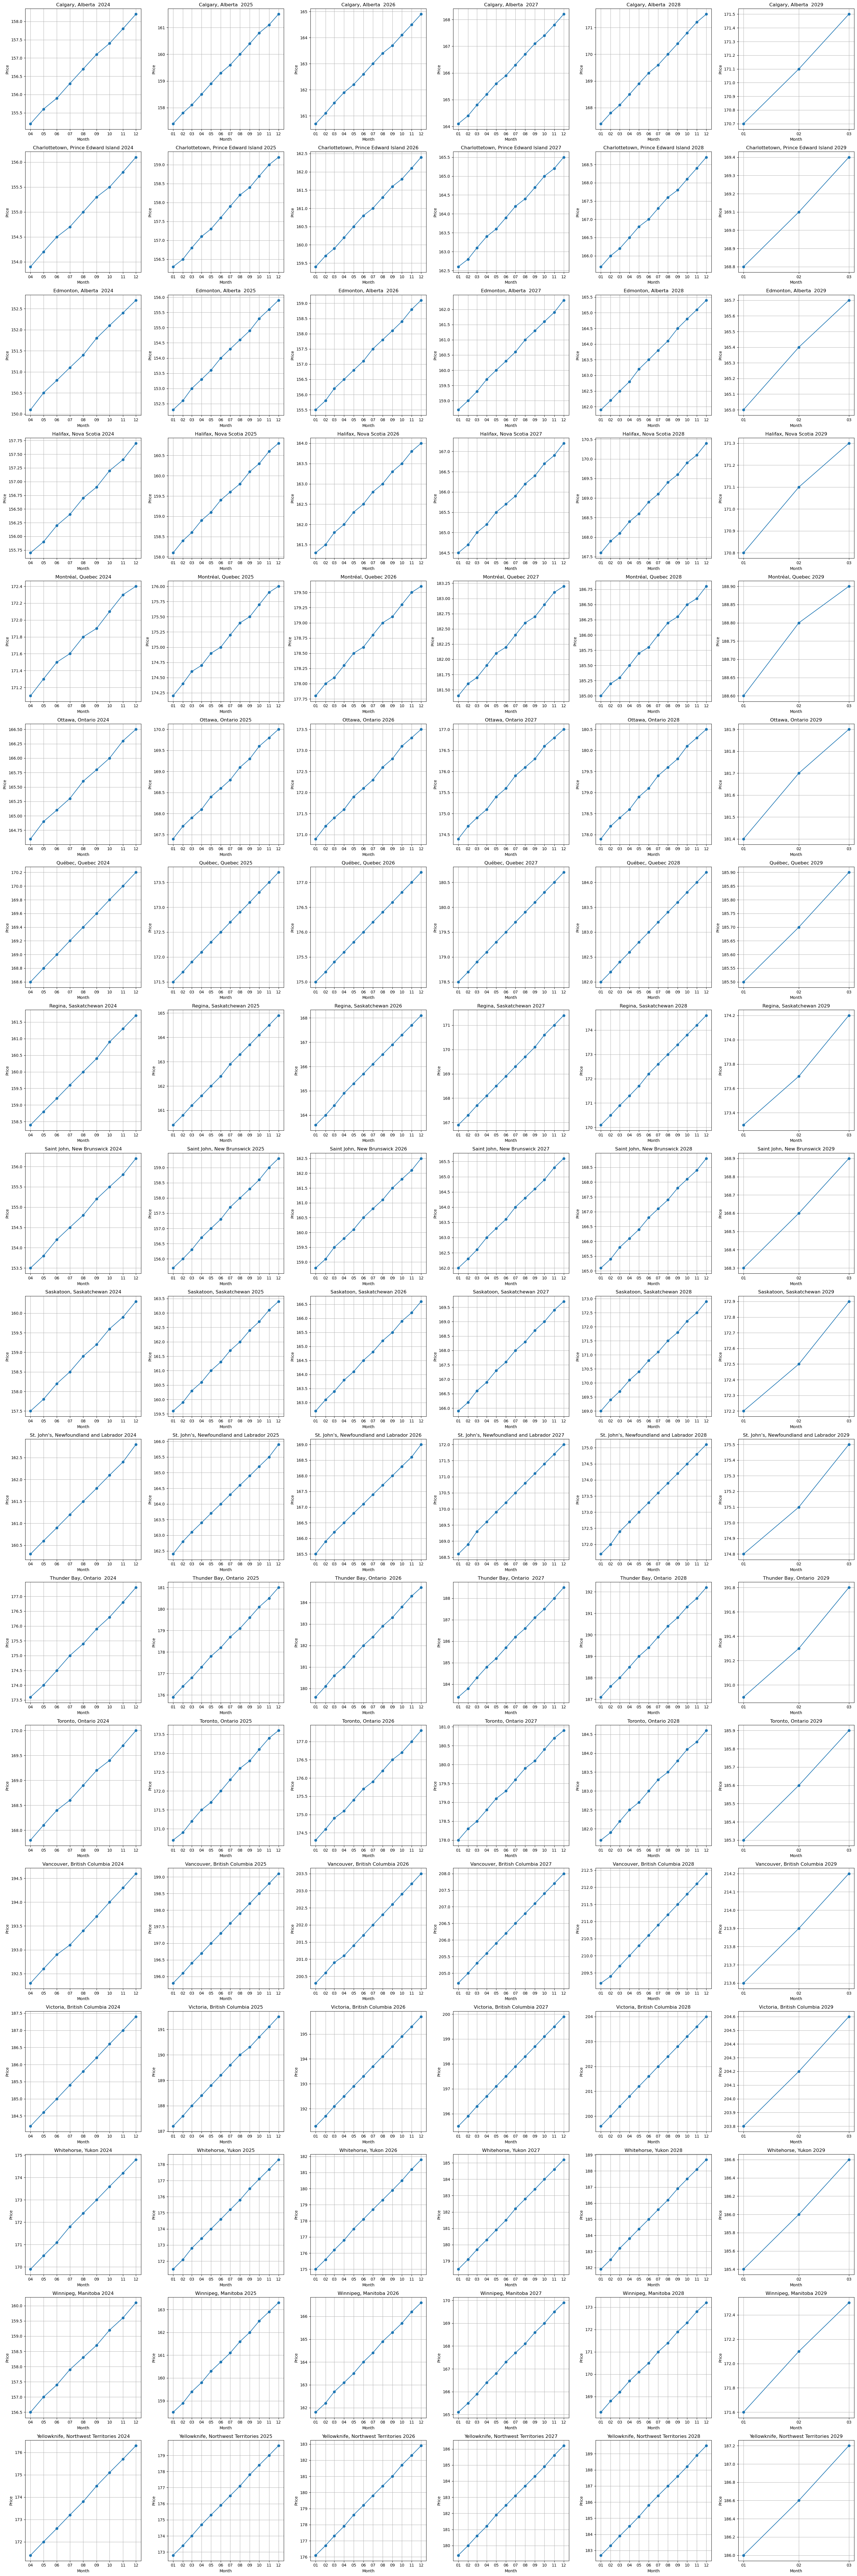

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Load your data
data = pd.read_csv('Predicted_Premium_Gas.csv')
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# Getting unique cities and years
cities = data['Location'].unique()
years = data['Year'].unique()

# Define the number of subplots needed based on the number of years
num_rows = len(cities)
num_cols = len(years)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), squeeze=False)

# Plotting
for i, city in enumerate(cities):
    for j, year in enumerate(years):
        ax = axes[i][j]
        city_year_data = data[(data['Location'] == city) & (data['Year'] == year)]
        if not city_year_data.empty:
            ax.plot(city_year_data['Date'], city_year_data['Predicted Prices'], marker='o')
            ax.set_title(f'{city} {year}')
            ax.set_xlabel('Month')
            ax.set_ylabel('Price')
            ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to month
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))  # Show only month numbers
            ax.grid(True)
        else:
            ax.set_visible(False)  # Hide axes if no data available

plt.tight_layout()
plt.show()